In [18]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# load and read csv files
city_data =pd.read_csv("data/city_data.csv")
#city_data # check loaded data
ride_data =pd.read_csv("data/ride_data.csv")
# ride_data # check loaded data

# Combine the data into a single dataset
combined_city_ride_data=pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
combined_city_ride_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
summary_city_ride_data=combined_city_ride_data.drop_duplicates(["city"])
#summary_city_ride_data=comined_city_ride_data.drop('index', axis=1) #should remove the column, but it does not find a column "index" as it is not part of the original data
#summary_city_ride_data=comined_city_ride_data.hide_index #questionable command, returns with error 'DataFrame' object has no attribute 'hide_index'
summary_city_ride_data.reset_index().head()

,index,city,date,fare,ride_id,driver_count,type
0,0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,24,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,55,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,80,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,103,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types

#total_revenue_sorted=purchase_data.groupby('Gender')["Price"].sum() # example only- do not use here
x_rides=combined_city_ride_data.groupby('city')["ride_id"].count()
x_rides.head() #calc of total rides per city verified

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [4]:
drivers=summary_city_ride_data.groupby('city')["driver_count"].sum()
drivers.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [23]:
driver_count=combined_city_ride_data.groupby('city')["driver_count"].sum()
driver_count.head()

city
Amandaburgh      216
Barajasview      572
Barronchester    176
Bethanyland      396
Bradshawfurt      70
Name: driver_count, dtype: int64

In [5]:
total_rides=x_rides*drivers # drivers impact size of the circle
total_rides.head()

city
Amandaburgh      216
Barajasview      572
Barronchester    176
Bethanyland      396
Bradshawfurt      70
dtype: int64

In [6]:
y_aver_fare=combined_city_ride_data.groupby('city')["fare"].mean() 
y_aver_fare.head() #calc of average fare verified

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

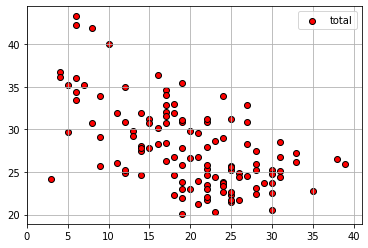

In [7]:
# Build the scatter plots for each city types
#total, =plt.plot(kind="scatter", x="x_rides", y="y_aver_fare", marker="o", facecolor="red",
#                 edgecolor="black", grid=True) #total
plt.scatter(x_rides, y_aver_fare, marker="o", facecolor="red", edgecolor="black", 
            label="total")
plt.xlim(0,max(x_rides)+2)
plt.legend(loc="best")
plt.grid(True)
plt.show()


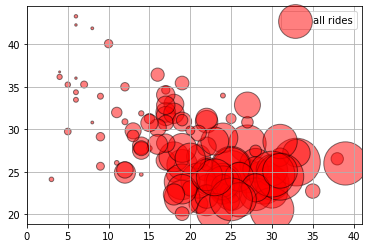

In [24]:
# Build the scatter plots for each city types
#total data plot
plt.scatter(x_rides, y_aver_fare, s=driver_count, marker="o", facecolor="red", 
            edgecolor="black", alpha=0.5, label="all rides")
plt.xlim(0,max(x_rides)+2)
plt.legend(loc="best")
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


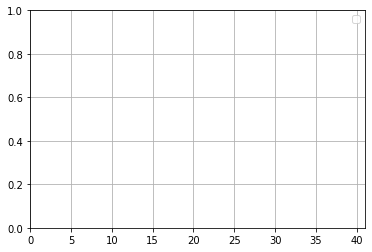

In [110]:
# Build the scatter plots for each city types
#total data plot with ledgend title
scatter=ax.scatter(x_rides, y_aver_fare, s=driver_count, marker="o", facecolor="red", 
            edgecolor="black", alpha=0.5)
legend=ax.legend(scatter.legend_elements(), loc="best", title="City Types")
ax.add_artist(legend)
plt.xlim(0,max(x_rides)+2)
plt.legend(loc="best")
plt.grid(True)
plt.show()

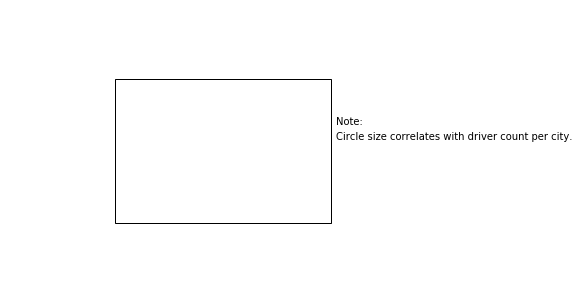

In [89]:
import matplotlib.patches as patches


# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)

ax.text(right+0.01, 0.6*(bottom+top), 'Note:',
        horizontalalignment='left',
        verticalalignment='center',
        #rotation='vertical',
        transform=ax.transAxes)

ax.text(right+0.01, 0.55*(bottom+top), 'Circle size correlates with driver count per city.',
        horizontalalignment='left',
        verticalalignment='center',
        #rotation='vertical',
        transform=ax.transAxes)

ax.set_axis_off()
plt.show()

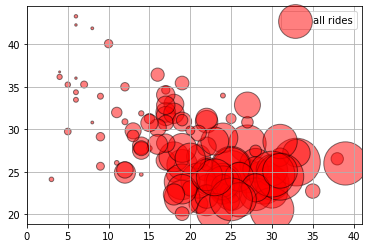

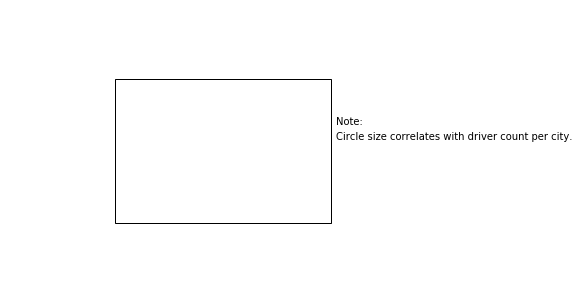

In [94]:
#total data plot
plt.scatter(x_rides, y_aver_fare, s=driver_count, marker="o", facecolor="red", 
            edgecolor="black", alpha=0.5, label="all rides")
plt.xlim(0,max(x_rides)+2)
plt.legend(loc="best")
plt.grid(True)

# To add a note next to the chart
import matplotlib.patches as patches
# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)

ax.text(right+0.01, 0.6*(bottom+top), 'Note:',
        horizontalalignment='left',
        verticalalignment='center',
        #rotation='vertical',
        transform=ax.transAxes)

ax.text(right+0.01, 0.55*(bottom+top), 'Circle size correlates with driver count per city.',
        horizontalalignment='left',
        verticalalignment='center',
        #rotation='vertical',
        transform=ax.transAxes)

ax.set_axis_off()
plt.show()

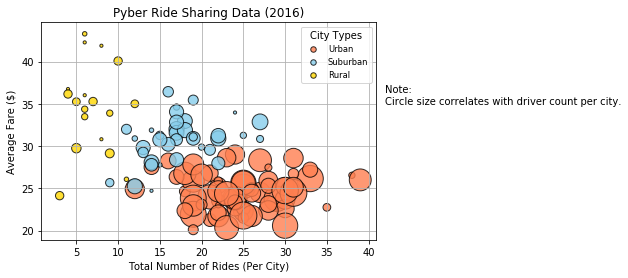

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [42]:
total_fare=combined_city_ride_data.groupby('type')["fare"].sum() 
total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

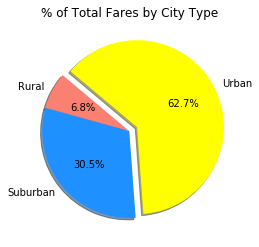

In [103]:
# Calculate Type Percents

labels=["Rural", "Suburban", "Urban"]
sizes=total_fare
colors=["salmon", "dodgerblue", "yellow"]
explode=(0, 0, 0.1)
# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
#plt.axis("equal")
#plt.xlim(0,60000)
#plt.ylim(0,40000)

# Save Figure # will add once chart is fixed
plt.show()


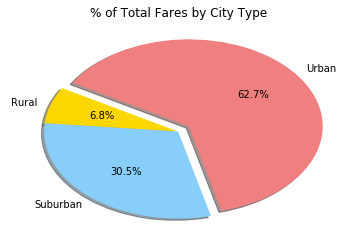

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

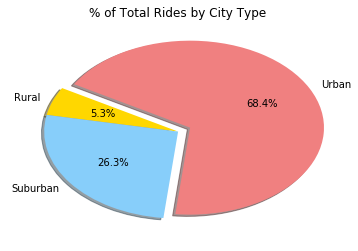

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

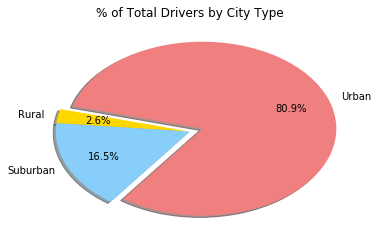

In [6]:
# Show Figure
plt.show()